In [50]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs  
from sklearn.metrics import accuracy_score

demension de X: 100
demension de Y: 1


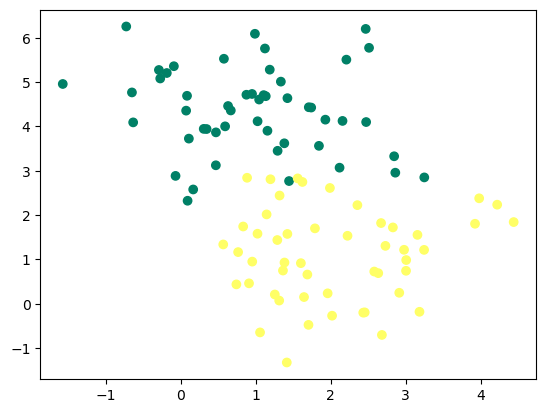

In [51]:
X,Y = make_blobs(n_samples=100,n_features=2,centers= 2 ,random_state=0)
Y=Y.reshape((Y.shape[0],1))

print(f"demension de X: {X.shape[0]}")
print(f"demension de Y: {Y.shape[1]}")

plt.scatter(X[:,0],X[:,1], c=Y,cmap="summer")
plt.show()


In [52]:
def initialisation(X):
    W=np.random.randn(X.shape[1],1)
    b=np.random.randn(1)
    return (W,b)

W,b= initialisation(X)

In [53]:
def model(X,W,b):
    Z=X.dot(W)+b
    A=1/(1+np.exp(-Z))
    return A
         


In [54]:
A= model(X,W,b)
A.shape

(100, 1)

In [55]:
def log_loss(A,Y):
    return 1/len(Y) * np.sum(-Y * np.log(A)-(1-Y) * np.log(1-A))

In [56]:
def  gradients(A,X,Y):
    dW= 1 / len(Y) * np.dot(X.T,A-Y)
    db=1/len(Y) * np.sum(A-Y)
    return (dW,db)
    

In [57]:
def update(dW,db,W,b,learning_rate):

    W = W - learning_rate * dW
    b = b - learning_rate * db

    return (W,b)
    


In [73]:
def predict(X ,W ,b):
    A=model(X ,W ,b)
    print(A)
    return A>=0.5
    


In [68]:
def artificial_neuron(X , Y, learning_rate=0.1, n_iter=100):
    W,b = initialisation(X)
    loss= []
    for i in range(n_iter):
        A = model(X,W,b)
        loss.append(log_loss(A,Y)) #loss = log_loss(A,Y)
        dW , db = gradients(A,X,Y)
        W , b = update(dW,db,W,b,learning_rate)

    Y_pred= predict(X ,W ,b)
    print(accuracy_score(Y,Y_pred))
    plt.plot(loss)
    plt.show()
    return (W,b)






    
    

0.86


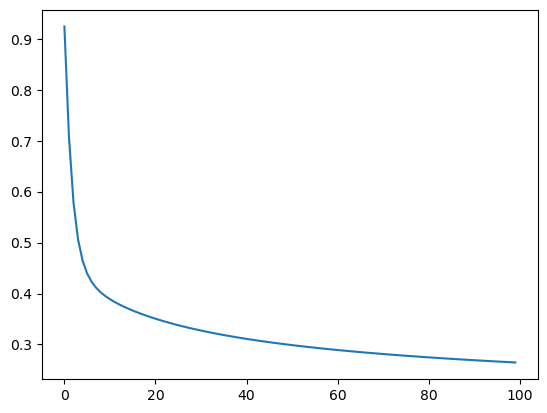

(array([[ 1.44521183],
        [-0.94867957]]),
 array([-0.13348469]))

In [70]:
W,b = artificial_neuron(X , Y)
W,b

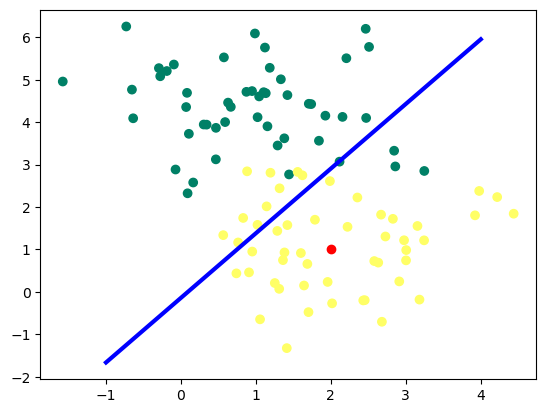

In [76]:
new_plante= np.array([2,1])
x0=np.linspace(-1,4,100)
x1= (-W[0]*x0-b) / W[1]
plt.scatter(new_plante[0],new_plante[1], c="r")

plt.scatter(X[:,0],X[:,1], c=Y,cmap="summer")
plt.plot(x0, x1, c="b", lw=3)
plt.show()


In [74]:
print(predict(new_plante ,W ,b))

[0.85915137]
[ True]
